<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.dropna(inplace=True)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

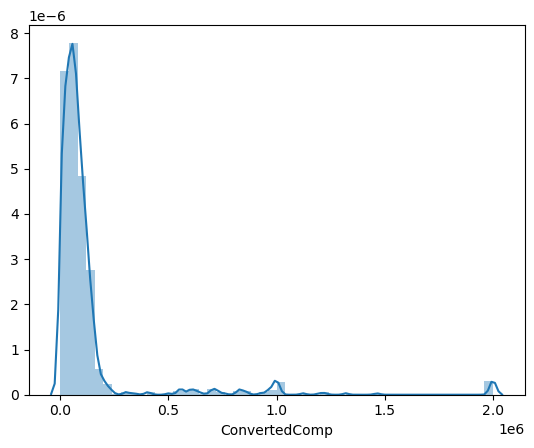

In [4]:
# your code goes here
sns.distplot(df['ConvertedComp'])

Plot the histogram for the column `ConvertedComp`.


In [5]:
# your code goes here
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [6]:
count, bin_edges=np.histogram(df['ConvertedComp'])
print(count)
print(bin_edges)

[932  14   9  13  12  12   3   1   0  12]
[      0.  200000.  400000.  600000.  800000. 1000000. 1200000. 1400000.
 1600000. 1800000. 2000000.]


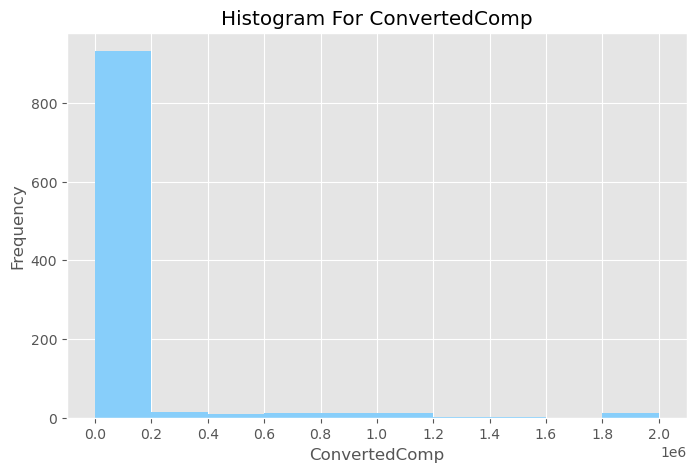

In [7]:
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges,color='lightskyblue')

plt.title('Histogram For ConvertedComp')
plt.ylabel('Frequency')
plt.xlabel('ConvertedComp')

plt.show()

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
df.loc[:,'ConvertedComp'].median()

65537.5

How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
df['Gender'].value_counts()

Man                                                      962
Woman                                                     37
Non-binary, genderqueer, or gender non-conforming          6
Man;Non-binary, genderqueer, or gender non-conforming      2
Woman;Man                                                  1
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here
df_woman=df[df['Gender']=='Woman']
df_woman['ConvertedComp'].median()

60000.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here
df['Age'].describe()

count    1008.000000
mean       30.627976
std         6.640693
min        19.000000
25%        26.000000
50%        29.000000
75%        34.000000
max        63.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


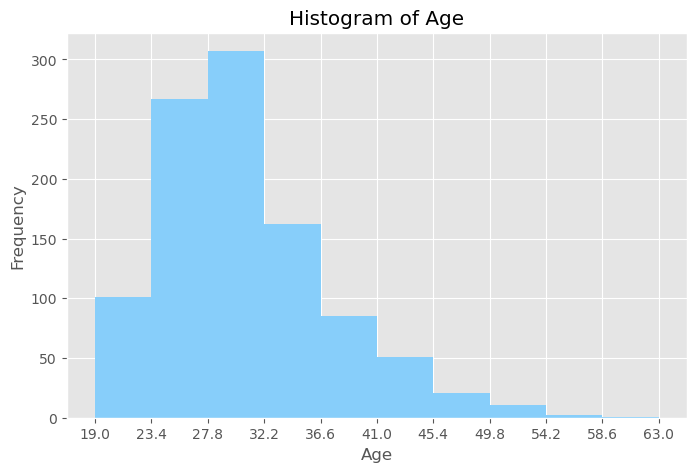

In [12]:
# your code goes here
count, bin_edges=np.histogram(df['Age'])
df['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges,color='lightskyblue')

plt.title('Histogram of Age')
plt.ylabel('Frequency')
plt.xlabel('Age')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


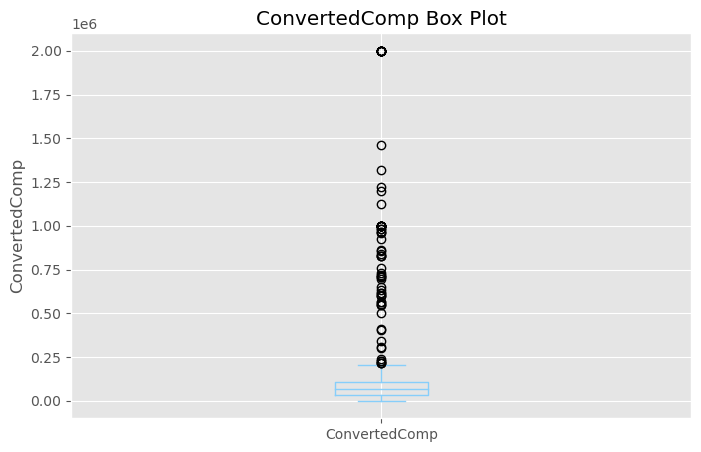

In [13]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(8, 5), color='lightskyblue')
plt.title('ConvertedComp Box Plot')
plt.ylabel('ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
# your code goes here
Q1, Q3=df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)
IQR=Q3-Q1
IQR

70842.5

Find out the upper and lower bounds.


In [15]:
# your code goes here
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print("Upper bound: ", upper)
print("Lower bound: ", lower)

Upper bound:  211511.25
Lower bound:  -71858.75


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:
# your code goes here
outliers = (df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)
outliers.value_counts()

False    937
True      71
Name: ConvertedComp, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.

In [17]:
# your code goes here
df_new=df['ConvertedComp'].clip(lower,upper)
df_new.head()

6      41244.0
15    156000.0
17     87996.0
36    117540.0
47      2169.0
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [18]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.057366,-0.065603,-0.060420,-0.038389,0.027928
CompTotal,-0.057366,1.000000,-0.028490,-0.006841,-0.039165,0.012503
ConvertedComp,-0.065603,-0.028490,1.000000,0.102571,-0.012538,0.109655
WorkWeekHrs,-0.060420,-0.006841,0.102571,1.000000,0.082863,0.040690
CodeRevHrs,-0.038389,-0.039165,-0.012538,0.082863,1.000000,-0.007431
Age,0.027928,0.012503,0.109655,0.040690,-0.007431,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
